# <h1><center>Fraud Detection Case study</center></h1>

Given Dataset: Dataset contain actual transaction with anonymized features and a time and a class feature (0 = non fraud, 1 = fraud)
Objective: build a robust model that can predict whether a transaction is fraudulent or not with more focus on predicting fraudulant transactions correctly.


I built different models to find the one with the lowest false negative (misclassified fraudulant transactions). 

Process:
- Imported and cleaned the data by standardizing the data using Sklearn StandardScalar.
- Built a deep learning model using TensorFlow and Keras with a 99% accuracy, yet with misclassified fraudulent transactions (false negatives) which we need to get rid of.
- Experimented with different optimization techniques such as undersampling and oversampling to find the model with the lowest misclassified fraudulant transactions.

**Import and explore the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check the columns
list(dataset)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [5]:
# check for nulls
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.shape

(284807, 31)

**Perform data Preprocessing**

In [7]:
# normlize the variables to make them have similar scales
from sklearn.preprocessing import StandardScaler
dataset['normaliedAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'], axis=1)
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normaliedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
# drop the time variable 
dataset = dataset.drop(['Time'], axis=1)

In [9]:
X = dataset.iloc[:, dataset.columns !='Class']
y = dataset.iloc[:, dataset.columns == 'Class']

In [10]:
print('number of fraudulant transactions:',len(y[y['Class'] == 1]))
print('number of non fraudulant transactions:',len(y[y['Class'] == 0]))

number of fraudulant transactions: 492
number of non fraudulant transactions: 284315


Data is clearly imbalanced. A resampling procedure might be useful in the optimization phase. 

**Modeling**

Build deep learning model

In [11]:
# data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [12]:
#Convert train and test into arrays for deep learning model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
# build sequential model with 5 layers, 85 units and dropout to prevent overfitting

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
    Dense(units = 16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24, activation= 'relu'),
    Dense(1,activation='sigmoid'),
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [14]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 9s 681us/step - loss: 0.0473 - accuracy: 0.9763
Epoch 2/5
13291/13291 [==============================] - 9s 698us/step - loss: 0.0045 - accuracy: 0.9992
Epoch 3/5
13291/13291 [==============================] - 9s 702us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 9s 684us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 9s 688us/step - loss: 0.0029 - accuracy: 0.9994


In [15]:
#evaulate the model
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 1s 470us/step - loss: 0.0036 - accuracy: 0.9992
[0.003645421704277396, 0.9992275834083557]


Even though the model has high accuracy rate, it is still not good enough as it's not predicting the the fraudulant transactions (true positives) accurately. 

In [16]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    classes=[0,1]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())

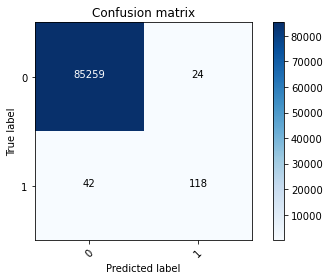

In [18]:
plot_confusion_matrix(cm)
plt.show()

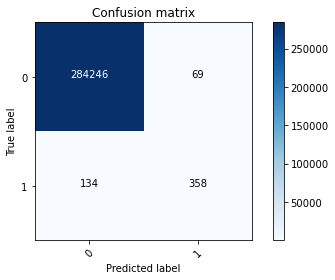

In [19]:
# predict on the whole dataset
y_pred = model.predict(X)
cm = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cm)

As expected, the model is able to predict non-fraudulant transactions almost all the time. However, that's not the case with fraudulant transactions. Let's look for ways to optimize the model and return lower rate of false negatives.

**Perform optimzation using sampling techniques**

- Undersampling: decrease the number of non-fraudulant transactions
- Oversampling (SMOTE): increase the number of fraudulant transactions

In [20]:
# undersampling

fraud_indices = np.array(dataset[dataset.Class == 1].index) #built an array of the fraud rows class
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [21]:
normal_indices = dataset[dataset.Class == 0].index ## built an array of data of the non fraud rows class 

In [22]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [23]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [24]:
under_sample_data = dataset.iloc[under_sample_indices,:]

In [25]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [26]:
# split undersampled data
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Model:

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 0s 803us/step - loss: 0.5502 - accuracy: 0.8641
Epoch 2/5
46/46 [==============================] - 0s 745us/step - loss: 0.1647 - accuracy: 0.9342
Epoch 3/5
46/46 [==============================] - 0s 793us/step - loss: 0.1761 - accuracy: 0.9281
Epoch 4/5
46/46 [==============================] - 0s 781us/step - loss: 0.1295 - accuracy: 0.9496
Epoch 5/5
46/46 [==============================] - 0s 707us/step - loss: 0.1039 - accuracy: 0.9625


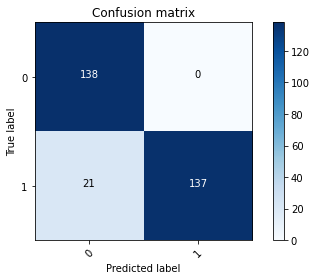

In [30]:
# predict X_test
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

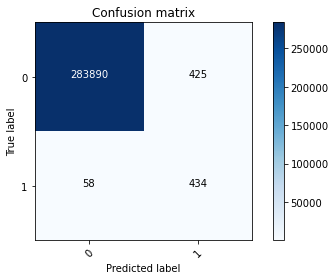

In [32]:
# predict on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

The model was able to successfully decrease the number of False Negatives. Even though we have larger number of False Positives, this is not a problem to us as we're only concerned with predicting fraudulant transactions.

In [33]:
# oversampling (SMOTE)
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [34]:
# split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size = 0.3)

In [35]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 19s 696us/step - loss: 0.0494 - accuracy: 0.9822
Epoch 2/5
26537/26537 [==============================] - 18s 692us/step - loss: 0.0139 - accuracy: 0.9965
Epoch 3/5
26537/26537 [==============================] - 18s 692us/step - loss: 0.0109 - accuracy: 0.9973
Epoch 4/5
26537/26537 [==============================] - 18s 693us/step - loss: 0.0097 - accuracy: 0.9977
Epoch 5/5
26537/26537 [==============================] - 18s 692us/step - loss: 0.0089 - accuracy: 0.9979


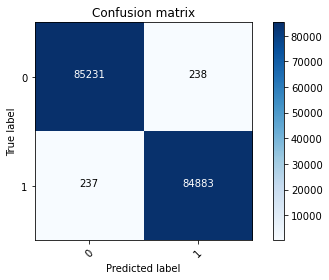

In [37]:
# predict X_test
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

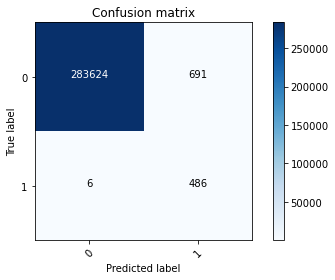

In [38]:
# predict on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

As can be seen, by performing oversampling on the data, we were able to predict almost all fraudulant transactions with only a few missclassifications.